# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

#### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

#### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

#### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Create a class of linear regression from scratch

class ScratchLinearRegression():
    """
    Implementation of linear regression from scratch
    
    Parameters
    ----------
    num_iter: int
        The number of iteration
    
    lr: float
        Learning rate
    
    bias: bool
        True if input the bias term
    
    verbose: bool
        True if output the learning process
    
    
    Attributes
    ----------
    self.coef_: ndarray whose shape is (n_features,)
        parameters
    
    self.loss: ndarray whose shape is (self.iter,)
        records of loss on train dataset
    
    self.val_loss: ndarray whose shape is (self.iter,)
        records of loss on validation dataset
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attribute
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit linear regression. In a case of inputting validation dataset, return loss and accuracy of 
        the data per iteration.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        y: ndarray whose shape is (n_samples,)
            Correct values of train dataset
        
        X_val: ndarray whose shape is (n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray whose shape is (n_samples,)
            Correct values of validation dataset
        """
        
        ###print("fit-1, X=",X.shape)   # (1168,2)
        ###print("fit-2, y=",y.shape)   # (1168,)
        ###print("fit-101, X_val=",X_val.shape)   # (292,2)
        ###print("fit-102, y_val=",y_val.shape)   # (292,)
        
        # Change the vectors to a matrix
        y = y.reshape(len(y), 1)
        if y_val is not None:
            y_val = y_val.reshape(len(y_val), 1)
        
        # Add a bias if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[1])])
            y_bias = np.array([1 for _ in range(y.shape[1])])
            ###print("fit-3, X_bias=",X_bias.shape)   # (1168,)
            ###print("fit-4, y_bias=",y_bias.shape)   # (1168,)
            # Add the biases
            X = np.vstack((X_bias, X))
            y = np.vstack((y_bias, y))
        
        # Transform dataframes to move their features to rows
        X = X.T
        y = y.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
            y_val = y_val.T
        
        ###print("fit-5, X=",X.shape)   # (2,1168)
        ###print("fit-6, y=",y.shape)   # (1,1168)
        ###if (X_val is not None) and (y_val is not None):
            ###print("fit-103, X_val=",X_val.shape)   # (2,292)
            ###print("fit-104, y_val=",y_val.shape)   # (1,292)
        
        # Set a hypothesis parameter randomly and transform it
        self.coef_ = np.random.randn(X.shape[0])
        self.coef_ = self.coef_.reshape(len(self.coef_),1)
        ###print("fit-7, self.coef_=",self.coef_.shape)   # (2,1)
        
        # Update the theta and get loss of train dataset
        for i in range(self.iter):
            # Update the parameter
            self.coef_ = self._gradient_descent(X, y)
            ###print("fit-8, self.coef_=",self.coef_.shape)   # (2,1)
            # Compute the mean square mean
            mse = self._compute_cost(X, y)
            ###print("fit-9, mse=",mse.shape)   # ()
            # Record the errors
            self.loss[i] = mse
            # Return the loss if verbose is True
            if self.verbose:
                print(self.loss[i])
            
            # Get loss of validation datasets
            if (X_val is not None) and (y_val is not None):
                # Get the mean square error
                val_mse = self._compute_cost(X_val, y_val)
                # Record the errors
                self.val_loss[i] = val_mse
                # Return the loss if verbose is True
                if self.verbose:
                    print(self.val_loss[i])
    
    
    def predict(self, X):
        """
        Predict by using linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by using linear regression
        """
        
        # Add a bias if self.bias is True
        if self.bias == True:
            X_bias = np.array([1 for _ in range(X.shape[1])])
            X = np.vstack((X_bias, X))
        
        ###print("predict-1, self.coef_=",self.coef_.shape)
        ###print("predict-2, X=",X.shape)
        
        # Predict train dataset
        y_pred = self._linear_hypothesis(X.T)   # (1,2) * (2,293)
        
        return y_pred
    
    
    # Create a definition of hypothesis function of linear regression
    def _linear_hypothesis(self, X):
        """
        Return hypothesis function of linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Train dataset
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by hypothesis function of linear regression
        """
        
        # Compute the hypothesis function
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_linear_hypothesis-1, y_pred=",y_pred.shape)   # (1,1168)
         
        return y_pred
    
    
    # Create a definition to compute the mean square error
    def _compute_cost(self, X, y):
        """
        Compute the mean square error. Import the "MSE" definition.

        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset

        y: ndarray whose shape is (n_samples,1)
            correct value


        Returns
        ----------
        ndarray whose shape is (1,)
            mean square error
        """

        y_pred = self._linear_hypothesis(X)
    
        return self.MSE(y_pred, y)
    
    
    # Create a definition of the mean square error
    def MSE(self, y_pred, y):
        """
        Return the mean square error
        
        Parameters
        ----------
        y_pred: ndarray whose shape is (n_samples,)
            predited value
        
        y: ndarray whose shape is (n_samples,)
            correct value
        
        
        Returns
        ----------
        mse: numpy.float
            mean square error
        """
        
        # Compute an error
        error = y_pred - y
        ###print("MSE-1, error=",error.shape)   # (1,1168)
        
        # Sum errors
        sum_errors = np.sum(error**2)
        
        # Return the mean square error devided by 2
        return sum_errors / (2*y.shape[1])
    
    
    # Create a definition to fit datasets by steepest descent method
    def _gradient_descent(self, X, y):
        """
        Fit datasets by steepest descent method
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset
        
        y: ndarray whose shape is (n_samples,1)
            correct value
        
        
        Returns
        ----------
        ndarray whose shape is (1,)
            parameter(weight)
        """
        
        # Predict train dataset
        y_pred = self._linear_hypothesis(X)   # (1,2) * (2,1168)
        ###print("_gradient_decsent-1, y_pred=",y_pred.shape)  # (1,1168)
        
        ###print("_gradient_decsent-1, y=",y.shape)   # (1,1168)
        
        # Compute the error and the mean square error
        error = y_pred - y   # (1,1168)
        ###print("_gradient_decsent-2, error=",error.shape)   # (1,1168)
        
        # Compute the gradient
        grad = np.dot(X, error.T)   # (2,1168) * (1168,1)
        ###print("_gradient_decsent-3, grad=",grad.shape)   # (2,1)
        
        # Update the parameter
        return self.coef_ - self.lr*grad/y.shape[1]
    
    
    # Plot learning records
    def plot_learning_record(self):
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()

### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [3]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [5]:
# Initialize the class

lin_reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
lin_reg.fit(std_X_train, y_train, std_X_test, y_test)

19425755359.003174
19826503127.034023
19425308483.658386
19825951459.678616
19424861712.389557
19825399915.18802
19424415045.172405
19824848493.534172
19423968481.98266
19824297194.68906
19423522022.796032
19823746018.624645
19423075667.588272
19823194965.312916
19422629416.335117
19822644034.725853
19422183269.01231
19822093226.835457
19421737225.595596
19821542541.613724
19421291286.060734
19820991979.032654
19420845450.3835
19820441539.064266
19420399718.53964
19819891221.68058
19419954090.50494
19819341026.853622
19419508566.255177
19818790954.555424
19419063145.766136
19818241004.758022
19418617829.013607
19817691177.43346
19418172615.97339
19817141472.5538
19417727506.621277
19816591890.091084
19417282500.933086
19816042430.017384
19416837598.884624
19815493092.304775
19416392800.45171
19814943876.92533
19415948105.61017
19814394783.851135
19415503514.33584
19813845813.054276
19415059026.60454
19813296964.506855
19414614642.392128
19812748238.180973
19414170361.674442
19812199634

19598253877.258156
19240866174.036118
19597752984.178318
19240462354.90287
19597252202.38334
19240058629.80029
19596751531.84787
19239654998.70644
19596250972.546547
19239251461.599392
19595750524.454025
19238848018.457207
19595250187.54495
19238444669.257984
19594749961.793987
19238041413.97979
19594249847.1758
19237638252.600723
19593749843.66506
19237235185.098877
19593249951.23645
19236832211.452343
19592750169.86464
19236429331.63924
19592250499.524334
19236026545.63767
19591750940.19022
19235623853.42574
19591251491.836994
19235221254.98158
19590752154.439373
19234818750.28331
19590252927.97206
19234416339.309067
19589753812.409782
19234014022.036976
19589254807.727257
19233611798.445187
19588755913.89922
19233209668.511837
19588257130.9004
19232807632.21508
19587758458.705547
19232405689.533077
19587259897.2894
19232003840.44398
19586761446.626717
19231602084.92596
19586263106.692253
19231200422.957188
19585764877.460785
19230798854.51584
19585266758.907066
19230397379.580086
19

19086615217.234352
19406056360.181267
19086247312.853256
19405598119.243423
19085879494.124775
19405139979.875282
19085511761.02893
19404681942.053722
19085144113.545746
19404224005.755627
19084776551.655254
19403766170.957893
19084409075.33748
19403308437.63741
19084041684.57247
19402850805.77108
19083674379.340275
19402393275.33581
19083307159.62093
19401935846.30851
19082940025.394497
19401478518.666103
19082572976.641033
19401021292.3855
19082206013.3406
19400564167.44364
19081839135.473263
19400107143.81745
19081472343.019093
19399650221.483868
19081105635.95817
19399193400.419834
19080739014.270573
19398736680.60231
19080372477.93639
19398280062.00824
19080006026.935715
19397823544.614586
19079639661.24863
19397367128.39831
19079273380.855247
19396910813.336384
19078907185.735664
19396454599.40579
19078541075.869995
19395998486.583492
19078175051.23835
19395542474.846493
19077809111.820854
19395086564.17178
19077443257.59762
19394630754.53634
19077077488.54878
19394175045.917187


18948766165.84767
19233984545.496185
18948430351.60501
19233564400.011234
18948094615.53006
19233144347.42967
18947758957.60458
19232724387.730366
18947423377.81035
19232304520.892216
18947087876.129135
19231884746.894104
18946752452.542732
19231465065.714916
18946417107.032913
19231045477.33357
18946081839.58148
19230625981.72895
18945746650.17022
19230206578.87998
18945411538.780937
19229787268.765556
18945076505.395424
19229368051.364613
18944741549.995502
19228948926.65607
18944406672.562973
19228529894.618847
18944071873.079647
19228110955.231888
18943737151.527363
19227692108.474117
18943402507.88793
19227273354.324486
18943067942.14318
19226854692.761948
18942733454.27495
19226436123.765438
18942399044.26507
19226017647.313923
18942064712.09538
19225599263.38637
18941730457.747734
19225180971.96174
18941396281.20397
19224762773.019
18941062182.445953
19224344666.537136
18940728161.455536
19223926652.49512
18940394218.21459
19223508730.87195
18940060352.704964
19223090901.646606


18811645702.413944
19062001882.577682
18811341802.669437
19061619715.74738
18811037973.649696
19061237633.192463
18810734215.338223
19060855634.89383
18810430527.718544
19060473720.832333
18810126910.774155
19060091890.988853
18809823364.48859
19059710145.34428
18809519888.84536
19059328483.879494
18809216483.828003
19058946906.57539
18808913149.42004
19058565413.412857
18808609885.605015
19058184004.372803
18808306692.36645
19057802679.436123
18808003569.6879
19057421438.583725
18807700517.55291
19057040281.79653
18807397535.945023
19056659209.05545
18807094624.847794
19056278220.341408
18806791784.244785
19055897315.635326
18806489014.11955
19055516494.918144
18806186314.45566
19055135758.170784
18805883685.23668
19054755105.374195
18805581126.446182
19054374536.509315
18805278638.067745
19053994051.55709
18804976220.08495
19053613650.498478
18804673872.481377
19053233333.314438
18804371595.240616
19052853099.98592
18804069388.34626
19052472950.4939
18803767251.781902
19052092884.819

18693898657.04369
18913563864.613808
18693622157.2524
18913214388.410267
18693345721.7967
18912864989.066242
18693069350.661594
18912515666.564312
18692793043.83208
18912166420.887054
18692516801.29317
18911817252.01705
18692240623.029865
18911468159.936905
18691964509.027195
18911119144.629192
18691688459.270157
18910770206.076527
18691412473.74378
18910421344.261497
18691136552.433083
18910072559.166714
18690860695.323105
18909723850.774788
18690584902.398865
18909375219.068325
18690309173.645397
18909026664.029957
18690033509.047752
18908678185.642292
18689757908.590958
18908329783.887955
18689482372.26006
18907981458.74958
18689206900.04011
18907633210.20981
18688931491.91616
18907285038.251263
18688656147.87327
18906936942.85659
18688380867.896484
18906588924.008434
18688105651.970882
18906240981.689453
18687830500.081516
18905893115.882298
18687555412.21346
18905545326.569614
18687280388.351788
18905197613.73407
18687005428.48157
18904849977.358337
18686730532.587894
18904502417.

18576998663.319073
18765392080.82677
18576749360.741806
18765075142.979805
18576500116.159172
18764758274.622402
18576250929.557648
18764441475.738823
18576001800.92372
18764124746.313354
18575752730.24388
18763808086.330276
18575503717.504604
18763491495.773865
18575254762.692398
18763174974.628418
18575005865.793747
18762858522.878223
18574757026.795155
18762542140.50758
18574508245.68312
18762225827.500782
18574259522.44415
18761909583.842133
18574010857.06475
18761593409.51594
18573762249.531445
18761277304.506523
18573513699.830727
18760961268.79818
18573265207.949127
18760645302.375237
18573016773.87317
18760329405.222015
18572768397.589367
18760013577.32283
18572520079.084255
18759697818.662025
18572271818.34436
18759382129.22392
18572023615.356216
18759066508.992855
18571775470.10636
18758750957.953167
18571527382.581333
18758435476.089203
18571279352.767677
18758120063.3853
18571031380.651936
18757804719.825817
18570783466.22066
18757489445.3951
18570535609.460403
18757174240.

18461309839.75743
18617834950.471687
18461087446.30442
18617550309.22047
18460865104.5733
18617265730.156612
18460642814.552017
18616981213.266068
18460420576.228516
18616696758.53479
18460198389.590748
18616412365.94874
18459976254.62667
18616128035.493877
18459754171.324234
18615843767.156174
18459532139.671402
18615559560.9216
18459310159.656124
18615275416.776127
18459088231.266373
18614991334.705734
18458866354.490116
18614707314.69639
18458644529.31532
18614423356.73409
18458422755.729965
18614139460.80481
18458201033.72201
18613855626.894543
18457979363.27945
18613571854.989277
18457757744.39026
18613288145.075016
18457536177.042416
18613004497.13775
18457314661.223907
18612720911.163486
18457093196.922737
18612437387.13823
18456871784.12688
18612153925.047985
18456650422.82434
18611870524.878765
18456429113.003113
18611587186.616585
18456207854.6512
18611303910.247463
18455986647.7566
18611020695.757423
18455765492.30732
18610737543.13248
18455544388.29138
18610454452.358673
18

18357511687.263046
18484522011.80355
18357313431.021305
18484266443.331833
18357115220.875896
18484010930.48713
18356917056.816082
18483755473.2569
18356718938.83112
18483500071.628597
18356520866.91027
18483244725.589703
18356322841.042805
18482989435.127674
18356124861.217987
18482734200.23
18355926927.425087
18482479020.884132
18355729039.653374
18482223897.077564
18355531197.892128
18481968828.79778
18355333402.130623
18481713816.032246
18355135652.358147
18481458858.768467
18354937948.56397
18481203956.993923
18354740290.737385
18480949110.69611
18354542678.867683
18480694319.86252
18354345112.94414
18480439584.480648
18354147592.956066
18480184904.53801
18353950118.892742
18479930280.022095
18353752690.74348
18479675710.92041
18353555308.49757
18479421197.220474
18353357972.144314
18479166738.909794
18353160681.67302
18478912335.975887
18352963437.072994
18478657988.406265
18352766238.33355
18478403696.18846
18352569085.443996
18478149459.309986
18352371978.393646
18477895277.758

18279611517.939713
18383795769.20933
18279431372.202393
18383562089.9598
18279251268.341206
18383328461.407352
18279071206.346382
18383094883.540573
18278891186.208176
18382861356.348072
18278711207.916843
18382627879.818424
18278531271.46262
18382394453.94025
18278351376.83576
18382161078.70214
18278171524.026516
18381927754.092705
18277991713.02515
18381694480.100555
18277811943.82192
18381461256.714294
18277632216.407085
18381228083.922543
18277452530.7709
18380994961.713913
18277272886.90365
18380761890.077026
18277093284.79558
18380528869.000496
18276913724.436977
18380295898.472954
18276734205.818104
18380062978.483017
18276554728.92924
18379830109.01933
18276375293.760662
18379597290.070507
18276195900.302647
18379364521.62519
18276016548.54547
18379131803.672024
18275837238.479427
18378899136.199627
18275657970.094795
18378666519.196663
18275478743.381863
18378433952.651768
18275299558.330925
18378201436.55358
18275120414.93227
18377968970.890766
18274941313.176193
18377736555.

18286353909.373516
18204583018.163128
18286141333.24404
18204420311.2449
18285928803.067642
18204257642.139805
18285716318.833992
18204095010.839012
18285503880.532776
18203932417.333733
18285291488.153683
18203769861.61515
18285079141.6864
18203607343.674473
18284866841.12061
18203444863.50289
18284654586.446007
18203282421.091606
18284442377.652298
18203120016.431824
18284230214.72916
18202957649.514748
18284018097.6663
18202795320.33159
18283806026.453426
18202633028.873558
18283594001.080235
18202470775.13185
18283382021.536434
18202308559.0977
18283170087.811733
18202146380.762314
18282958199.89584
18201984240.11691
18282746357.77847
18201822137.152706
18282534561.44934
18201660071.860924
18282322810.898163
18201498044.232788
18282111106.114666
18201336054.259525
18281899447.088566
18201174101.93236
18281687833.80959
18201012187.242527
18281476266.267464
18200850310.181263
18281264744.451923
18200688470.739788
18281053268.35269
18200526668.909348
18280841837.959515
18200364904.681

18139763121.524532
18201185987.756695
18139615477.00171
18200991790.35178
18139467866.783283
18200797634.776516
18139320290.861275
18200603521.021526
18139172749.22768
18200409449.077435
18139025241.87452
18200215418.934883
18138877768.793808
18200021430.58449
18138730329.977562
18199827484.016895
18138582925.417805
18199633579.222736
18138435555.106556
18199439716.192642
18138288219.035828
18199245894.917255
18138140917.19766
18199052115.387222
18137993649.584064
18198858377.593185
18137846416.187084
18198664681.525784
18137699216.998745
18198471027.175674
18137552052.011066
18198277414.533504
18137404921.2161
18198083843.589928
18137257824.60587
18197890314.335598
18137110762.172417
18197696826.761166
18136963733.90778
18197503380.8573
18136816739.804
18197309976.61466
18136669779.853127
18197116614.023903
18136522854.047195
18196923293.0757
18136375962.378258
18196730013.76071
18136229104.838364
18196536776.06962
18136082281.41956
18196343579.993084
18135935492.1139
18196150425.5217

18078402871.334564
18120180311.99663
18078269481.739426
18120003529.91773
18078136123.128654
18119826785.769238
18078002795.49503
18119650079.542675
18077869498.831345
18119473411.22956
18077736233.130375
18119296780.82142
18077602998.38492
18119120188.309765
18077469794.58776
18118943633.68613
18077336621.7317
18118767116.942043
18077203479.809532
18118590638.069023
18077070368.814045
18118414197.05861
18076937288.738045
18118237793.90233
18076804239.57432
18118061428.591717
18076671221.315685
18117885101.118313
18076538233.954937
18117708811.473648
18076405277.484875
18117532559.64927
18076272351.89831
18117356345.63672
18076139457.188053
18117180169.427532
18076006593.346912
18117004031.013268
18075873760.367695
18116827930.385464
18075740958.24321
18116651867.535675
18075608186.966286
18116475842.455444
18075475446.529728
18116299855.136345
18075342736.926353
18116123905.569912
18075210058.14899
18115947993.74771
18075077410.19045
18115772119.661304
18074944793.04356
18115596283.30

18024777248.11544
18048844651.159218
18024656313.376984
18048683145.701588
18024535406.722637
18048521674.761364
18024414528.145855
18048360238.330845
18024293677.640102
18048198836.40233
18024172855.19885
18048037468.968124
18024052060.81555
18047876136.020523
18023931294.48368
18047714837.551834
18023810556.1967
18047553573.554363
18023689845.948097
18047392344.020412
18023569163.73132
18047231148.942295
18023448509.539856
18047069988.312325
18023327883.36718
18046908862.12281
18023207285.20676
18046747770.366062
18023086715.052082
18046586713.03441
18022966172.896618
18046425690.120163
18022845658.733852
18046264701.615635
18022725172.557266
18046103747.51316
18022604714.360348
18045942827.805054
18022484284.13658
18045781942.483643
18022363881.879444
18045621091.541256
18022243507.582436
18045460274.970222
18022123161.23904
18045299492.76286
18022002842.842747
18045138744.911522
18021882552.387054
18044978031.408516
18021762289.865463
18044817352.24621
18021642055.271454
1804465670

17975938888.654213
17983366841.765774
17975829293.955914
17983219302.573635
17975719724.701553
17983071794.785583
17975610180.885212
17982924318.394627
17975500662.500965
17982776873.39376
17975391169.542892
17982629459.776
17975281702.005077
17982482077.53437
17975172259.881596
17982334726.66187
17975062843.16654
17982187407.15152
17974953451.85399
17982040118.99634
17974844085.938026
17981892862.18935
17974734745.412754
17981745636.723564
17974625430.272247
17981598442.592003
17974516140.5106
17981451279.7877
17974406876.121906
17981304148.303673
17974297637.100254
17981157048.132957
17974188423.43975
17981009979.26857
17974079235.134476
17980862941.703545
17973970072.178543
17980715935.430912
17973860934.566036
17980568960.44371
17973751822.29107
17980422016.73497
17973642735.34773
17980275104.29773
17973533673.730133
17980128223.125027
17973424637.432377
17979981373.209896
17973315626.448566
17979834554.54539
17973206640.772816
17979687767.124535
17973097680.399227
17979541010.9403

17930984767.538376
17922597070.67355
17930885608.160774
17922462439.319866
17930786471.798058
17922327836.49962
17930687358.444862
17922193262.206463
17930588268.095837
17922058716.434067
17930489200.74562
17921924199.176094
17930390156.388866
17921789710.426205
17930291135.02022
17921655250.17809
17930192136.634335
17921520818.42539
17930093161.225857
17921386415.161793
17929994208.789436
17921252040.380966
17929895279.319736
17921117694.07658
17929796372.811405
17920983376.24232
17929697489.259094
17920849086.871853
17929598628.657467
17920714825.958862
17929499791.001183
17920580593.497025
17929400976.284893
17920446389.480022
17929302184.50327
17920312213.901527
17929203415.650963
17920178066.755245
17929104669.72264
17920043948.034843
17929005946.71297
17919909857.734013
17928907246.61662
17919775795.846447
17928808569.428246
17919641762.36583
17928709915.14253
17919507757.28585
17928611283.75413
17919373780.60021
17928512675.25772
17919239832.30259
17928414089.647976
17919105912.

17889862111.215347
17866518780.997715
17889772495.063335
17866396008.527546
17889682899.705242
17866273261.959988
17889593325.136242
17866150541.289303
17889503771.351482
17866027846.509747
17889414238.346134
17865905177.61558
17889324726.115368
17865782534.60108
17889235234.654335
17865659917.46051
17889145763.958218
17865537326.18813
17889056314.02217
17865414760.778214
17888966884.841373
17865292221.22503
17888877476.410988
17865169707.522854
17888788088.726196
17865047219.66596
17888698721.782158
17864924757.648613
17888609375.574055
17864802321.465096
17888520050.097057
17864679911.10968
17888430745.346348
17864557526.576653
17888341461.317097
17864435167.860283
17888252198.004486
17864312834.954865
17888162955.40369
17864190527.854668
17888073733.509895
17864068246.55397
17887984532.31828
17863945991.047077
17887895351.824028
17863823761.328262
17887806192.02232
17863701557.391815
17887717052.908348
17863579379.232014
17887627934.47729
17863457226.843166
17887538836.72434
1786333

17853588789.91449
17816603116.22723
17853507589.19465
17816490851.490223
17853426407.310642
17816378610.33074
17853345244.258095
17816266392.743576
17853264100.032623
17816154198.723507
17853182974.629852
17816042028.26534
17853101868.045395
17815929881.363865
17853020780.27488
17815817758.013874
17852939711.313923
17815705658.210163
17852858661.158154
17815593581.947525
17852777629.803196
17815481529.22077
17852696617.24468
17815369500.02469
17852615623.478218
17815257494.35408
17852534648.499454
17815145512.20375
17852453692.30401
17815033553.568504
17852372754.887516
17814921618.44314
17852291836.24561
17814809706.82246
17852210936.37391
17814697818.70128
17852130055.268063
17814585954.074406
17852049192.923695
17814474112.93664
17851968349.336437
17814362295.282803
17851887524.501938
17814250501.10769
17851806718.41583
17814138730.406124
17851725931.073746
17814026983.17292
17851645162.47133
17813915259.40289
17851564412.604218
17813803559.090847
17851483681.46806
17813691882.23161

17770950304.11361
17820647686.27021
17770847605.071373
17820574125.67338
17770744927.495632
17820500582.135086
17770642271.38165
17820427055.651344
17770539636.724705
17820353546.218197
17770437023.52006
17820280053.831673
17770334431.762993
17820206578.48781
17770231861.448776
17820133120.182648
17770129312.57269
17820059678.912216
17770026785.130005
17819986254.672558
17769924279.11599
17819912847.45971
17769821794.525936
17819839457.269707
17769719331.355118
17819766084.098595
17769616889.59881
17819692727.942413
17769514469.252293
17819619388.79721
17769412070.31086
17819546066.65902
17769309692.76978
17819472761.523888
17769207336.62435
17819399473.387863
17769105001.869846
17819326202.246994
17769002688.50156
17819252948.09732
17768900396.514774
17819179710.934895
17768798125.904785
17819106490.75576
17768695876.666874
17819033287.555977
17768593648.796337
17818960101.331585
17768491442.28846
17818886932.07864
17768389257.138546
17818813779.793198
17768287093.341877
17818740644.4

17728145851.30428
17790139838.301285
17728052077.39552
17790073351.323708
17727958322.989094
17790006879.759483
17727864588.08072
17789940423.605038
17727770872.66611
17789873982.85678
17727677176.74099
17789807557.511135
17727583500.301067
17789741147.56451
17727489843.342068
17789674753.013332
17727396205.859707
17789608373.854023
17727302587.849705
17789542010.082993
17727208989.307777
17789475661.696674
17727115410.229656
17789409328.691483
17727021850.61106
17789343011.063847
17726928310.447716
17789276708.81019
17726834789.735344
17789210421.926926
17726741288.46968
17789144150.410492
17726647806.646442
17789077894.257313
17726554344.261356
17789011653.46381
17726460901.310158
17788945428.02642
17726367477.788578
17788879217.94157
17726274073.69234
17788813023.205685
17726180689.017185
17788746843.815197
17726087323.758842
17788680679.76654
17725993977.91304
17788614531.056145
17725900651.475517
17788548397.68044
17725807344.442013
17788482279.635868
17725714056.808258
1778841617

17762264869.37436
17688538735.468277
17762204843.493702
17688453177.456074
17762144831.52404
17688367637.143513
17762084833.462135
17688282114.526722
17762024849.304756
17688196609.601818
17761964879.048668
17688111122.364925
17761904922.690647
17688025652.812176
17761844980.227455
17687940200.939693
17761785051.65586
17687854766.7436
17761725136.97264
17687769350.220028
17761665236.17456
17687683951.3651
17761605349.258396
17687598570.174953
17761545476.220917
17687513206.645714
17761485617.05889
17687427860.773518
17761425771.769108
17687342532.55449
17761365940.348324
17687257221.984768
17761306122.793327
17687171929.060482
17761246319.100887
17687086653.777775
17761186529.267784
17687001396.132774
17761126753.2908
17686916156.121624
17761066991.166702
17686830933.74045
17761007242.89228
17686745728.985405
17760947508.464314
17686660541.852615
17760887787.879574
17686575372.33823
17760828081.13485
17686490220.43838
17760768388.226925
17686405086.14922
17760708709.152576
17686319969.

17653174930.888485
17737532339.46069
17653096669.56394
17737478044.424747
17653018424.34298
17737423761.96755
17652940195.222095
17737369492.086166
17652861982.19776
17737315234.777687
17652783785.266476
17737260990.039185
17652705604.42471
17737206757.86773
17652627439.668964
17737152538.26041
17652549290.995712
17737098331.214306
17652471158.401455
17737044136.72649
17652393041.882668
17736989954.79405
17652314941.43585
17736935785.414062
17652236857.05749
17736881628.58361
17652158788.744076
17736827484.299786
17652080736.4921
17736773352.559658
17652002700.29806
17736719233.360325
17651924680.158447
17736665126.69886
17651846676.06975
17736611032.572357
17651768688.02847
17736556950.977898
17651690716.0311
17736502881.91257
17651612760.074146
17736448825.373466
17651534820.15409
17736394781.357666
17651456896.267437
17736340749.86227
17651378988.41069
17736286730.884357
17651301096.58034
17736232724.42102
17651223220.7729
17736178730.469357
17651145360.984863
17736124749.02645
1765

17715209855.697216
17620747783.655712
17715160731.349686
17620676176.67568
17715111618.379158
17620604584.348328
17715062516.78299
17620533006.670467
17715013426.558537
17620461443.63891
17714964347.70316
17620389895.250465
17714915280.21421
17620318361.501953
17714866224.08905
17620246842.39018
17714817179.32504
17620175337.91195
17714768145.91954
17620103848.0641
17714719123.869907
17620032372.843433
17714670113.173504
17619960912.24676
17714621113.827694
17619889466.270912
17714572125.829838
17619818034.9127
17714523149.1773
17619746618.168938
17714474183.867443
17619675216.036453
17714425229.89763
17619603828.51206
17714376287.265224
17619532455.592575
17714327355.967594
17619461097.27483
17714278436.002106
17619389753.555637
17714229527.366123
17619318424.431828
17714180630.05702
17619247109.900223
17714131744.07216
17619175809.957638
17714082869.408905
17619104524.600906
17714034006.06463
17619033253.826855
17713985154.03671
17618961997.632305
17713936313.322506
17618890756.01408

17590808433.324146
17694746344.928104
17590742935.40008
17694701959.036697
17590677450.801136
17694657583.421276
17590611979.524426
17694613218.07946
17590546521.567043
17694568863.00886
17590481076.926117
17694524518.207096
17590415645.59874
17694480183.67177
17590350227.582043
17694435859.400497
17590284822.873127
17694391545.390907
17590219431.469105
17694347241.640602
17590154053.3671
17694302948.147205
17590088688.564213
17694258664.908333
17590023337.05757
17694214391.9216
17589957998.844284
17694170129.18463
17589892673.92148
17694125876.695034
17589827362.286255
17694081634.45044
17589762063.935745
17694037402.44846
17589696778.867058
17693993180.686718
17589631507.077316
17693948969.162838
17589566248.563644
17693904767.87443
17589501003.323154
17693860576.819134
17589435771.352978
17693816395.994556
17589370552.650227
17693772225.398327
17589305347.21203
17693728065.028072
17589240155.035503
17693683914.881416
17589174976.117775
17693639774.955975
17589109810.455975
176935956

In [7]:
lin_reg.predict(std_X_test)

array([[ 5.50913794e+04, -3.21357886e+04,  8.80702933e+04,
        -6.37448364e+04, -8.62494014e+03,  3.72847069e+04,
        -5.16482903e+04,  2.64093473e+03,  3.75789708e+03,
        -5.32683626e+04, -1.87281353e+04, -3.54588429e+04,
        -3.99571797e+04, -6.54644989e+04,  2.96531366e+04,
         3.58980107e+04, -4.39077701e+04,  4.09739653e+04,
        -3.05271149e+04, -7.03941881e+04,  2.54162550e+04,
         7.98134125e+03,  3.62589329e+04,  2.68527463e+04,
        -4.58836059e+04,  1.92388143e+04,  1.81666270e+02,
         2.01504796e+04, -5.43397307e+04,  2.82052468e+04,
         2.00747674e+04, -6.54281412e+04,  6.01130653e+04,
         7.75824210e+04, -4.49045072e+04,  3.74537694e+04,
        -2.63545468e+04,  8.49164883e+03,  5.28922123e+04,
         8.10185029e+04, -4.91880640e+04, -4.90179204e+04,
         5.67391348e+04, -3.28763524e+04,  6.39184713e+04,
        -3.86513544e+04, -2.94856183e+04, -4.08719648e+04,
        -3.66205648e+04,  7.94616632e+04, -8.28165625e+0

# Validation

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

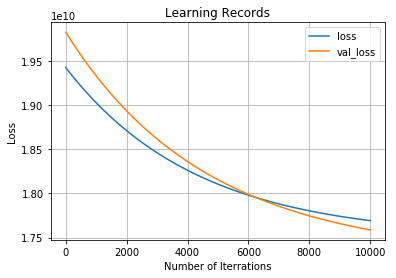

In [8]:
lin_reg.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.